## روش Decision tree:

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [3]:
my_data = pd.read_csv('16325569497737558.csv', delimiter=",")
my_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
my_data['output'] = my_data['output'].astype(str)
my_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### داده های x و y را تشکیل می دهیم:

In [5]:
x = my_data[['age', 'sex', 'cp', 'trtbps', 'chol', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
x[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. , 233. ,   1. ,   0. , 150. ,
          0. ,   2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. , 250. ,   0. ,   1. , 187. ,
          0. ,   3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. , 204. ,   0. ,   0. , 172. ,
          0. ,   1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. , 236. ,   0. ,   1. , 178. ,
          0. ,   0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. , 354. ,   0. ,   1. , 163. ,
          1. ,   0.6,   2. ,   0. ,   2. ]])

In [6]:
y = my_data['output']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: object

#### داده هایمان را با استفاده از تابع train_test_split به تو بخش آموزش و تست تقسیم میکنیم و 20 درصد داده ها را به عنوان داده تست(test_size=0.2) در نظر می گیریم.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(242, 14) (242,)
(61, 14) (61,)


#### DecisionTreeClassifier را به داده های آموزش (x_train, y_train) اعمال می کنیم. 

In [9]:
illness_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
illness_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
illness_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
pred_tree = illness_tree.predict(x_test)

In [12]:
print(pred_tree[0:10])
print(y_test[0:10])

['0' '0' '1' '1' '1' '0' '1' '1' '1' '1']
113    1
249    0
18     1
142    1
299    0
270    0
294    0
162    1
13     1
24     1
Name: output, dtype: object


### ارزیابی مدل:

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_tree))

DecisionTrees's Accuracy:  0.8524590163934426


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61

Confusion matrix, without normalization
[[19  6]
 [ 3 33]]


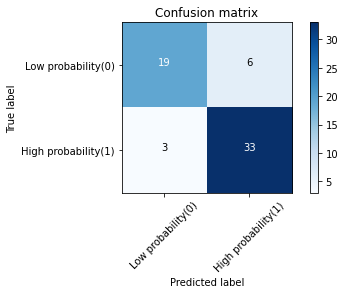

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_tree, labels=['0','1'])
np.set_printoptions(precision=0)

print (classification_report(y_test, pred_tree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low probability(0)','High probability(1)'],normalize= False,  title='Confusion matrix')

### بصری سازی مدل:

In [17]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [18]:
my_data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output       object
dtype: object

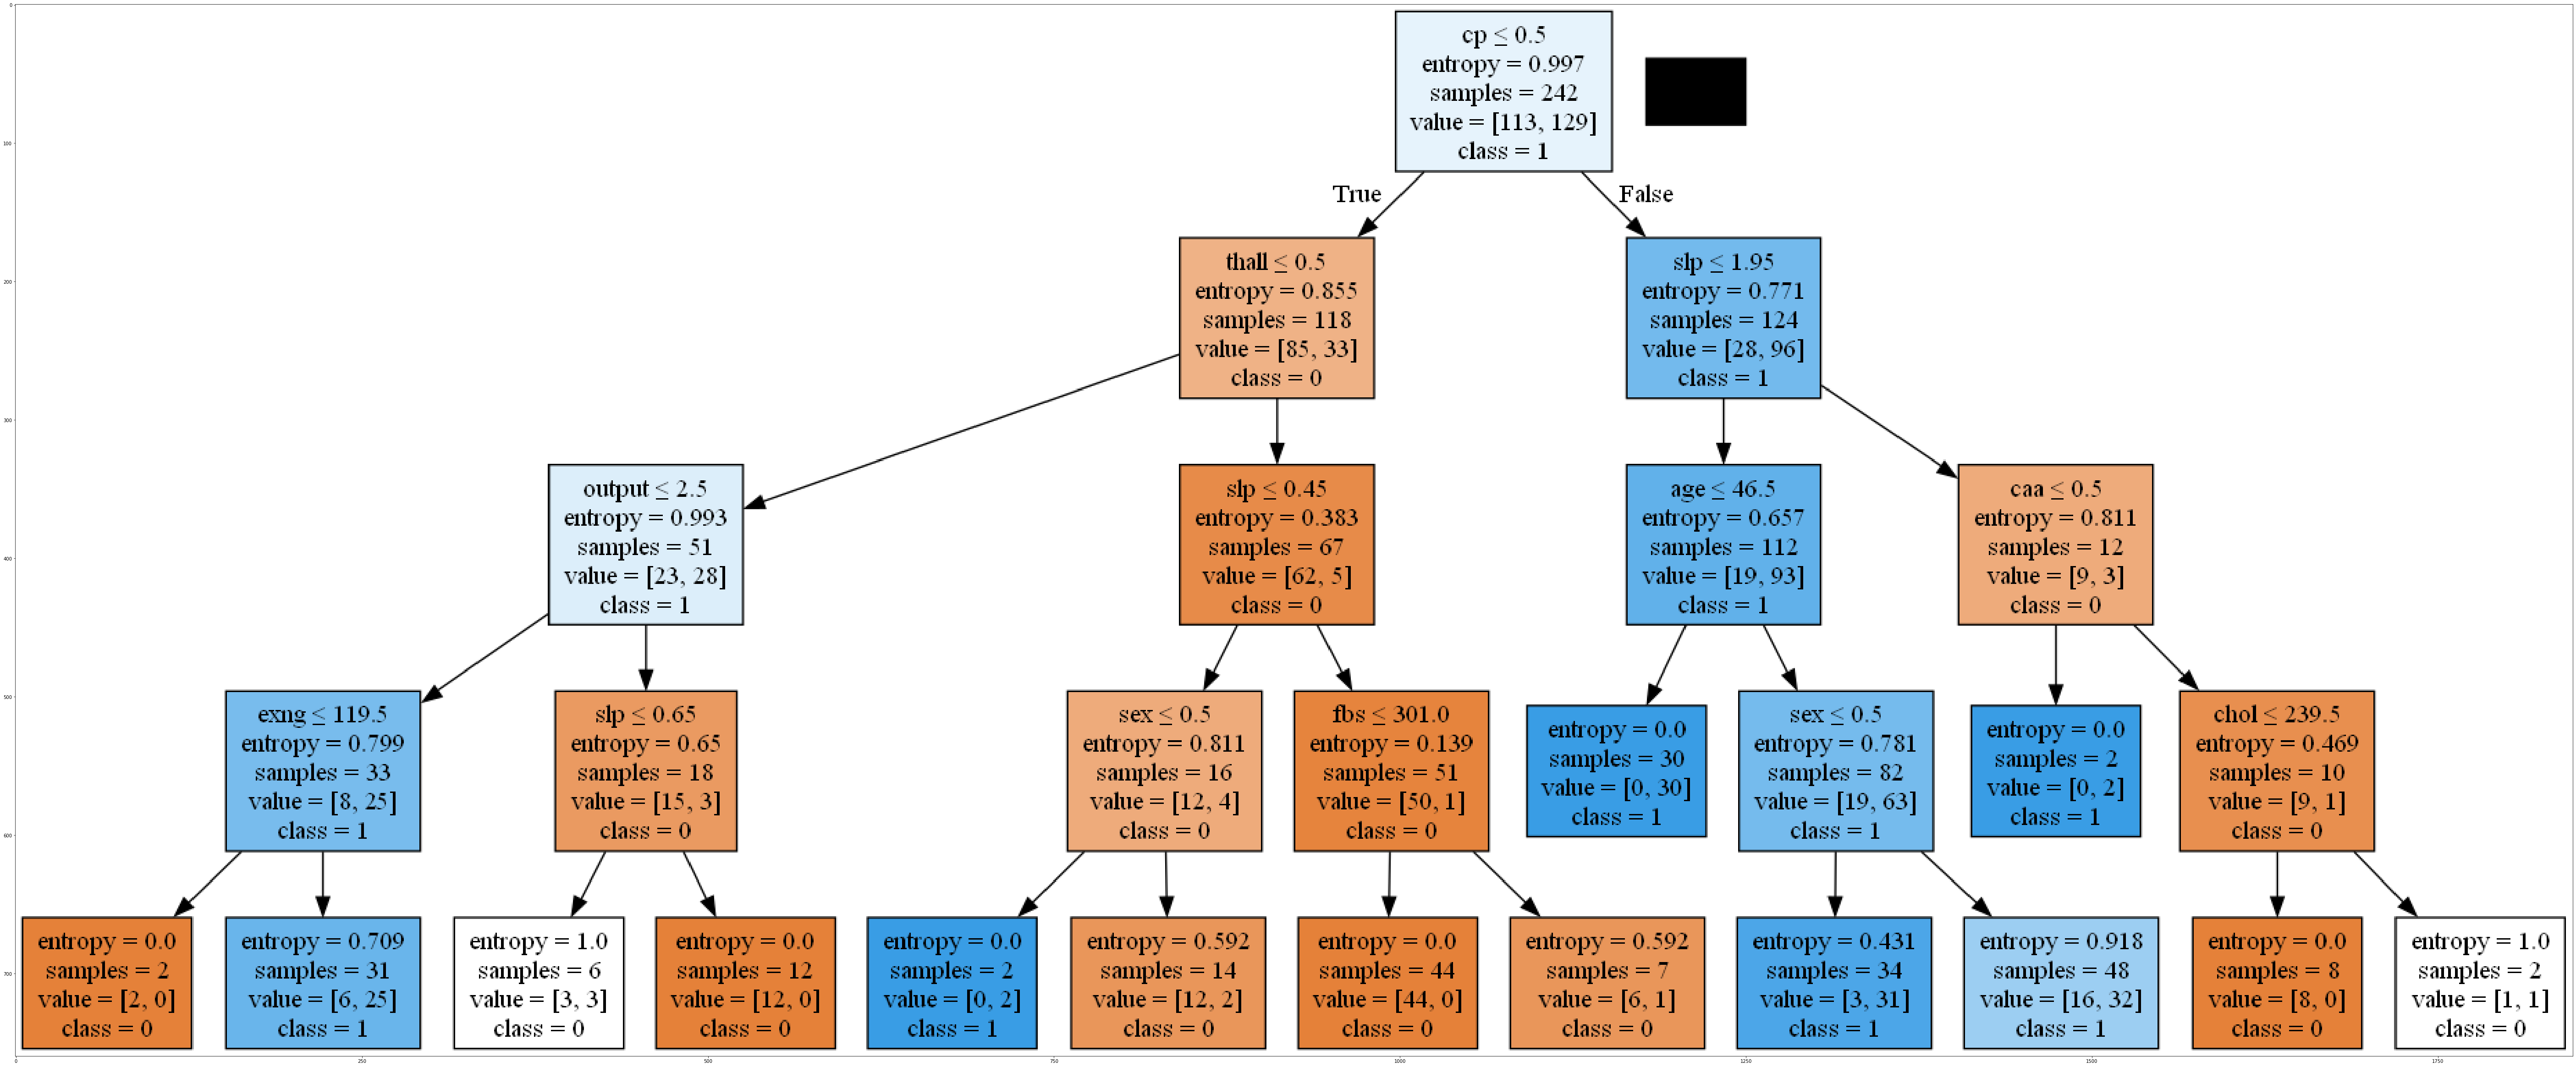

In [19]:
dot_data = StringIO()
filename = "illness_tree.png"
featureNames = my_data.columns[0:14]
out=tree.export_graphviz(illness_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## روش K-Nearest Neighbors:

In [20]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [21]:
df = pd.read_csv("16325569497737558.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

In [23]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

#### داده های x و y را تشکیل می دهیم:

In [24]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']].values
X[0:5]

array([[ 63.,   1.,   3., 145., 233.,   1.,   0., 150.,   0.,   2.,   0.,
          0.,   1.],
       [ 37.,   1.,   2., 130., 250.,   0.,   1., 187.,   0.,   4.,   0.,
          0.,   2.],
       [ 41.,   0.,   1., 130., 204.,   0.,   0., 172.,   0.,   1.,   2.,
          0.,   2.],
       [ 56.,   1.,   1., 120., 236.,   0.,   1., 178.,   0.,   1.,   2.,
          0.,   2.],
       [ 57.,   0.,   0., 120., 354.,   0.,   1., 163.,   1.,   1.,   2.,
          0.,   2.]])

In [25]:
Y = df['output'].values
Y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### نرمال سازی دیتا:
#### با استفاده از تابع StandardScaler داده های مربوط به X را نرمال میکنیم. این کار بهتر است برای الگوریتم هایی مثل KNN که بر اساس فاصله نقاط داده ها عمل می کنند، انجام شود. 

In [26]:
scalar = preprocessing.StandardScaler().fit(X)
X = scalar.transform(X.astype(float))
print(X[0:5])

[[ 1.  1.  2.  1. -0.  2. -1.  0. -1.  1. -2. -1. -2.]
 [-2.  1.  1. -0.  0. -0.  1.  2. -1.  2. -2. -1. -1.]
 [-1. -1.  0. -0. -1. -0. -1.  1. -1.  0.  1. -1. -1.]
 [ 0.  1.  0. -1. -0. -0.  1.  1. -1. -0.  1. -1. -1.]
 [ 0. -1. -1. -1.  2. -0.  1.  1.  1. -0.  1. -1. -1.]]


#### داده هایمان را با استفاده از تابع train_test_split به تو بخش آموزش و تست تقسیم میکنیم و 15 درصد داده ها را به عنوان داده تست(test_size=0.15) در نظر می گیریم.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=4)
print("Train set: ", X_train.shape, Y_train.shape)
print("Test set: ", X_test.shape, Y_test.shape)

Train set:  (257, 13) (257,)
Test set:  (46, 13) (46,)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [30]:
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(Y_test[0:5])

[1 0 1 1 0]
[1 0 1 1 0]


### ارزیابی مدل:

In [31]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.8599221789883269
Test set Accuracy:  0.8695652173913043


              precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.92      0.85      0.88        27

    accuracy                           0.87        46
   macro avg       0.86      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46

Confusion matrix, without normalization
[[17  2]
 [ 4 23]]


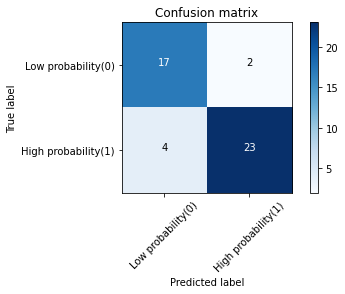

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[0,1])
np.set_printoptions(precision=0)

print (classification_report(Y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low probability(0)','High probability(1)'],normalize= False, title='Confusion matrix')

#### برای k از 1 تا 10 دقت را محاسبه می کنیم تا بهترین k را برای KNN بدست بیاوریم و همانطور که مشاهده می شود بیشترین دقت برای k=4 است که ما استفاده کردیم.

In [33]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
      
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
print(*mean_acc)

0.782608695652174 0.782608695652174 0.8478260869565217 0.8695652173913043 0.8478260869565217 0.8043478260869565 0.8478260869565217 0.8695652173913043 0.8043478260869565


In [34]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8695652173913043 with k= 4


## روش SVM:

In [35]:
import pylab as pl
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv("16325569497737558.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### نگاهی به نوع داده های هرستون می اندازیم تا در صورت نیاز تغییرات لازم را بر روی آن ها اعمال کنیم:

In [37]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

#### همینطور با استفاده از تابع describe داده هایمان را مورد بررسی قرار می دهیم:

In [38]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

#### داده های x , y را تشکیل می دهیم. ستون 'output' را در y قرار می دهیم، چون در واقع می خواهیم که مدل output را پیش بینی کند که آیا احتمال حمله قلبی زیاد است یا کم.

In [40]:
feature_df = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']]
X = np.asarray(feature_df)
X[0:5]

array([[ 63.,   1.,   3., 145., 233.,   1.,   0., 150.,   0.,   2.,   0.,
          0.,   1.],
       [ 37.,   1.,   2., 130., 250.,   0.,   1., 187.,   0.,   4.,   0.,
          0.,   2.],
       [ 41.,   0.,   1., 130., 204.,   0.,   0., 172.,   0.,   1.,   2.,
          0.,   2.],
       [ 56.,   1.,   1., 120., 236.,   0.,   1., 178.,   0.,   1.,   2.,
          0.,   2.],
       [ 57.,   0.,   0., 120., 354.,   0.,   1., 163.,   1.,   1.,   2.,
          0.,   2.]])

In [41]:
y = np.asarray(df['output'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

#### داده هایمان را با استفاده از تابع train_test_split به تو بخش آموزش و تست تقسیم میکنیم و 20 درصد داده ها را به عنوان داده تست(test_size=0.2) در نظر می گیریم.

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


#### svm را به داده های آموزشمان اعمال میکنیم و از بین kernelهای موجود(linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’) از linear استفاده کردیم.

In [43]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [44]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 0, 1, 1, 1], dtype=int64)

### ارزیابی مدل:

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

Confusion matrix, without normalization
[[22  3]
 [ 2 34]]


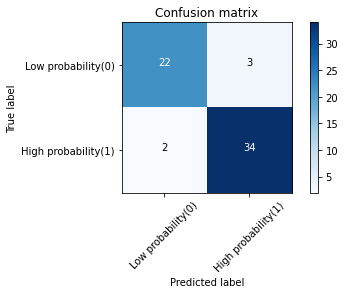

In [45]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=0)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low probability(0)','High probability(1)'],normalize= False,  title='Confusion matrix')

In [46]:
# compute jaccard score
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.8148148148148148